In [1]:
import os

import matplotlib.pyplot as plt
import torch
import torchvision
from torchvision.datasets import CelebA
from AlexNet.MyAlexNetPretrainer import AlexNetMini, AlexNetPretrainer
from torch.utils.data import DataLoader

In [2]:
standard_transform = torchvision.transforms.Compose([
    torchvision.transforms.PILToTensor(),
    torchvision.transforms.ConvertImageDtype(torch.float),
    torchvision.transforms.Resize(size=223),
    torchvision.transforms.CenterCrop(size=223)
])

In [3]:
train_dataset = CelebA('', download=False, split='train', transform=standard_transform)

In [4]:
valid_dataset = CelebA('', download=False, split='valid', transform=standard_transform)

In [5]:
train_dataset[0][0].shape

torch.Size([3, 223, 223])

## Pretraining convolutional layers

In [6]:
# data loading hyper-parameters
train_batch_size = 64
valid_batch_size = 16

In [7]:
train_dataloader = DataLoader(train_dataset, train_batch_size, shuffle=True, num_workers=2)
valid_dataloader = DataLoader(valid_dataset, valid_batch_size)

In [16]:
pretrainer = AlexNetPretrainer()
pretrainer.load_state_dict(torch.load('celeba_pretrainer.pt'))

<All keys matched successfully>

We pretrain first 5 layers of AlexNet, i.e. all convolutional layers

In [34]:
# first layer
pretrainer.pretrain(train_dataloader, 1, epochs=1, lr=1e-2, momentum=.9, wd=1e-5, unpack=True)

Pretraining the 1 th layer of AlexNet Mini.
Epochs: 1
Learning rate: 0.01
Momentum: 0.9
Weight decay: 1e-05
Epoch 1
[   635 |  10174] loss: 0.06291953731645546
[  1270 |  10174] loss: 0.06305737260758408
[  1905 |  10174] loss: 0.06286126032588989
[  2540 |  10174] loss: 0.06286920791301201
[  3175 |  10174] loss: 0.06279050473739782
[  3810 |  10174] loss: 0.06272375146000404
[  4445 |  10174] loss: 0.06280962544984704
[  5080 |  10174] loss: 0.06295300371886238
[  5715 |  10174] loss: 0.06268232827932815
[  6350 |  10174] loss: 0.06290173439646331
[  6985 |  10174] loss: 0.06303400805616004
[  7620 |  10174] loss: 0.06284992450804222
[  8255 |  10174] loss: 0.0629189478130791
[  8890 |  10174] loss: 0.06256175399647923
[  9525 |  10174] loss: 0.06281049468033896
[ 10160 |  10174] loss: 0.06270684740088117
Epoch loss: 0.06284226684061968


In [28]:
# second layer
pretrainer.pretrain(train_dataloader, 2, epochs=2, lr=5e-3, momentum=.9, wd=1e-5, unpack=True)

Pretraining the 2 th layer of AlexNet Mini.
Epochs: 2
Learning rate: 0.005
Momentum: 0.9
Weight decay: 1e-05
Epoch 1
[   159 |   2544] loss: 0.13187857028804248
[   318 |   2544] loss: 0.13227522766815042
[   477 |   2544] loss: 0.13284702017997047
[   636 |   2544] loss: 0.13341240537991314
[   795 |   2544] loss: 0.13411528340675546


KeyboardInterrupt: 

In [11]:
# third layer
pretrainer.pretrain(train_dataloader, 3, epochs=2, lr=4e-3, momentum=.9, wd=1e-5, unpack=True)

Pretraining the 3 th layer of AlexNet Mini.
Epochs: 2
Learning rate: 0.004
Momentum: 0.9
Weight decay: 1e-05
Epoch 1
[   159 |   2544] loss: 0.08587552574050578
[   318 |   2544] loss: 0.086694339770566
[   477 |   2544] loss: 0.08678278462879313
[   636 |   2544] loss: 0.08810543334521588
[   795 |   2544] loss: 0.0891374575923074
[   954 |   2544] loss: 0.09326540988008931
[  1113 |   2544] loss: 0.0927759938926067
[  1272 |   2544] loss: 0.09499176272993567
[  1431 |   2544] loss: 0.09200641733108077
[  1590 |   2544] loss: 0.09332965244099779
[  1749 |   2544] loss: 0.09372387086070559
[  1908 |   2544] loss: 0.09234908059145669
[  2067 |   2544] loss: 0.09438525702593462
[  2226 |   2544] loss: 0.09293282097615536
[  2385 |   2544] loss: 0.09263958974079516
[  2544 |   2544] loss: 0.09419938242472943
Epoch loss: 0.09145373451002177
Epoch 2
[   159 |   2544] loss: 0.09463020027438297
[   318 |   2544] loss: 0.09475918404711117
[   477 |   2544] loss: 0.09434452076565544
[   636 |  

In [12]:
# fourth layer
pretrainer.pretrain(train_dataloader, 4, epochs=1, lr=5e-4, momentum=.9, wd=1e-5, unpack=True)

Pretraining the 4 th layer of AlexNet Mini.
Epochs: 1
Learning rate: 0.0005
Momentum: 0.9
Weight decay: 1e-05
Epoch 1
[   159 |   2544] loss: 0.18816707519036305
[   318 |   2544] loss: 0.18805459301051852
[   477 |   2544] loss: 0.1890940507815319
[   636 |   2544] loss: 0.18819437658636826
[   795 |   2544] loss: 0.18783428608996314
[   954 |   2544] loss: 0.1880910057316786
[  1113 |   2544] loss: 0.1872164486151821
[  1272 |   2544] loss: 0.18819746178276134
[  1431 |   2544] loss: 0.18801782050597593
[  1590 |   2544] loss: 0.1878508544942868
[  1749 |   2544] loss: 0.1871128941669404
[  1908 |   2544] loss: 0.18778715952762268
[  2067 |   2544] loss: 0.1875926650732568
[  2226 |   2544] loss: 0.18842494572108648
[  2385 |   2544] loss: 0.1879322144595332
[  2544 |   2544] loss: 0.18858933505022302
Epoch loss: 0.18800601318666021


In [15]:
# fifth layer
pretrainer.pretrain(train_dataloader, 5, epochs=1, lr=3e-2, momentum=.9, wd=1e-5, unpack=True)

Pretraining the 5 th layer of AlexNet Mini.
Epochs: 1
Learning rate: 0.03
Momentum: 0.9
Weight decay: 1e-05
Epoch 1
[   159 |   2544] loss: 0.13175713643431664
[   318 |   2544] loss: 0.13110077535768724
[   477 |   2544] loss: 0.13130716548400856
[   636 |   2544] loss: 0.13142362096399632
[   795 |   2544] loss: 0.1311556005252982
[   954 |   2544] loss: 0.13108857496167128
[  1113 |   2544] loss: 0.13119586992938564
[  1272 |   2544] loss: 0.13171635122981462
[  1431 |   2544] loss: 0.13148816192300064
[  1590 |   2544] loss: 0.13167162206750246
[  1749 |   2544] loss: 0.13161303145143222
[  1908 |   2544] loss: 0.13174196440468794
[  2067 |   2544] loss: 0.13154879029629366
[  2226 |   2544] loss: 0.13158134150804965
[  2385 |   2544] loss: 0.13079807790195416
[  2544 |   2544] loss: 0.13147196890610569
Epoch loss: 0.13141282056253287


In [17]:
recon = pretrainer.forward(train_dataset[9][0])

Code size: torch.Size([128, 6, 6])


In [21]:
torch.save(pretrainer.state_dict(), 'celeba_pretrainer.pt')

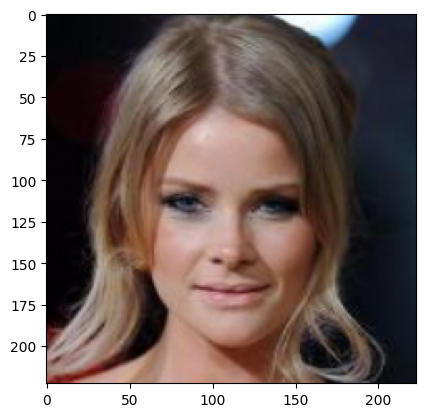

In [19]:
plt.imshow(torchvision.transforms.ToPILImage()(train_dataset[9][0]))

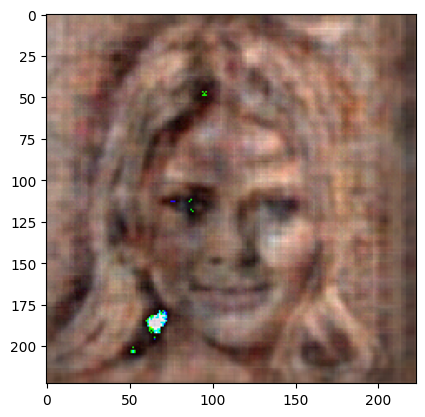

In [20]:
plt.imshow(torchvision.transforms.ToPILImage()(recon))

So that's the reconstruction of the image by the autoencoder trained in a greedy, layer-wise way. We can now initialize an AlexNet Mini network by these weights to harness benefits of unsupervised pretraining.